### 비음수 행렬 분해(NMF)

In [1]:
# 데이터 불러오기
from sklearn import datasets
raw_face=datasets.fetch_lfw_people(min_faces_per_person=20,
                                   resize= 0.5,
                                   color=False)

In [2]:
# 데이터 형태
n_samples, h, w = raw_face.images.shape
print('얼굴 데이터 갯수: %d'%n_samples)
print(h)
print(w)

X = raw_face.data
n, p = X.shape
print('얼굴 데이터 갯수: %d'%n)
print(p) # p=h*w, 이미지 행렬을 일렬로 늘어뜨림

y = raw_face.target
target_names = raw_face.target_names
k = target_names.shape[0]
print('얼굴의 종류: %d'%k)

얼굴 데이터 갯수: 2361
62
47
얼굴 데이터 갯수: 2361
2914
얼굴의 종류: 40


In [3]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=1)

In [4]:
# 비음수 행렬 분해
from sklearn.decomposition import NMF
nmf = NMF(n_components=10, random_state=0)
nmf.fit(X_tn)
X_tn_nmf = nmf.transform(X_tn)
X_te_nmf = nmf.transform(X_te)

C:\Users\exem\.conda\envs\py3_7_6\lib\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
C:\Users\exem\.conda\envs\py3_7_6\lib\site-packages\sklearn\decomposition\_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


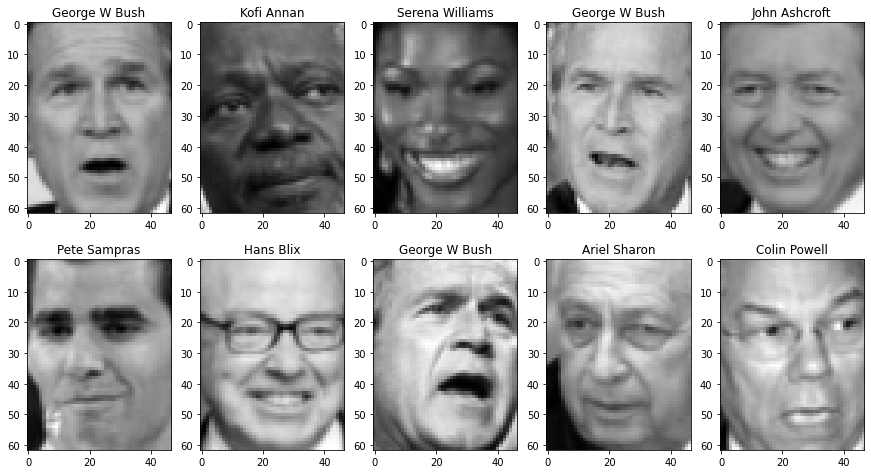

In [5]:
# 원본 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.gray()
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn[i].reshape((h, w)))
    plt.title(target_names[y_tn[i]])
plt.show()

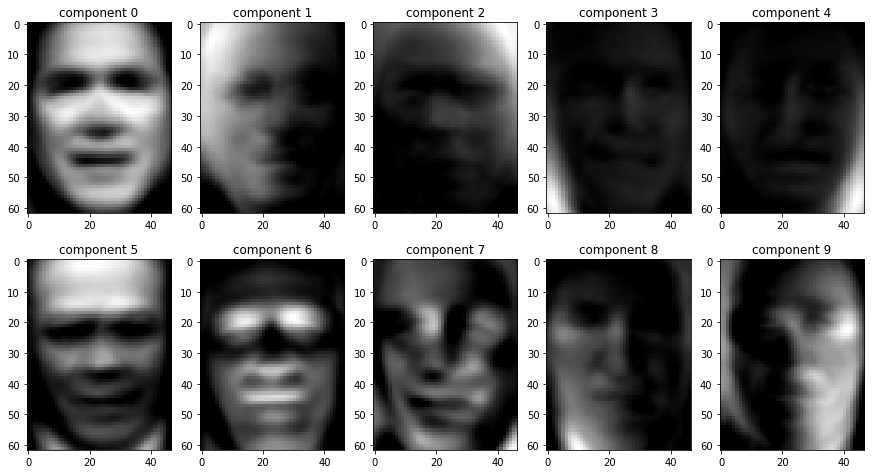

In [6]:
# 비음수 행렬 분해 적합 이후 시각화
plt.figure(figsize=(15, 8))
plt.gray()
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(nmf.components_[i].reshape((h, w)))
    plt.title("component {}".format(i))
plt.show()